In [1]:
!pip install mwapi pywikibot

In [7]:
%%bash

echo "family = 'wikipedia'" > user-config.py
echo "mylang = 'en'" >> user-config.py
echo "usernames['wikipedia']['en'] = u'Staeiou'" >> user-config.py

In [8]:
import pywikibot

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [74]:
def rev_to_dict(rev):

    rev_dict = {'revid':rev['revid'],
                'text':rev['text'],
                'timestamp':rev['timestamp'],
                'user_text':rev['user'],
                'anon':rev['anon'],
                'comment':rev['comment'],
                'minor':rev['minor']}

    return rev_dict

In [75]:
def revs_to_df(revs):
    
    if type(revs) == dict:
        revs = [revs]

    rev_columns = ['revid', 'text', 'timestamp', 'user_text', 'anon', 'comment', 'minor']
    
    revs_df = pd.DataFrame(columns=rev_columns)
    
    for rev in revs:
        rev_dict = rev_to_dict(rev)
        rev_df_row = pd.Series(rev_dict)
        revs_df = revs_df.append(rev_df_row, ignore_index=True)
        
    return revs_df

In [10]:
site = pywikibot.Site()

In [ ]:
site.login()

In [211]:
bot_policy = pywikibot.Page(site, u"Wikipedia:Bot_policy")
bag = pywikibot.Page(site, u"Wikipedia:Bot_Approvals_Group")
bots = pywikibot.Page(site, u"Wikipedia:Bots")

In [225]:
bot_policy_revs =  bot_policy.revisions(content=True)
bag_revs = bag.revisions(content=True)
bots_revs = bots.revisions(content=True)

In [226]:
bot_policy_df = revs_to_df(bot_policy_revs)
bag_df = revs_to_df(bag_revs)
bots_df = revs_to_df(bots_revs)

In [227]:
len(bot_policy_df)

1765

In [228]:
len(bag_df)

643

In [229]:
len(bots_df)

348

In [230]:
bot_policy_df['text_length'] = bot_policy_df['text'].apply(len)
bag_df['text_length'] = bot_policy_df['text'].apply(len)
bots_df['text_length'] = bots_df['text'].apply(len)

In [231]:
bot_policy_df[0:2].transpose()

,0,1
revid,7.73639e+08,7.72121e+08
text,{{policy|WP:BOTPOL}}\n\n{{nutshell|Automated o...,{{policy|WP:BOTPOL}}\n\n{{nutshell|Automated o...
timestamp,2017-04-03 14:56:35,2017-03-25 12:41:31
user_text,Headbomb,Anomie
anon,False,False
comment,"/* Bot requirements */ indents, use numbering",grammar
minor,False,True
text_length,34005,34020


In [232]:
bot_policy_df = bot_policy_df.set_index('timestamp')
bag_df = bag_df.set_index('timestamp')
bots_df = bots_df.set_index('timestamp')

In [233]:
bot_policy_df['page_title'] = "Bot_policy"
bag_df['page_title'] = "Bot_Approvals_Group"
bots_df['page_title'] = "Bots"

In [234]:
all_bot_df = bot_policy_df.append(bag_df)
all_bot_df = all_bot_df.append(bots_df)

In [235]:
all_bot_df

,revid,text,user_text,anon,comment,minor,text_length,page_title
timestamp,,,,,,,,
2017-04-03 14:56:35,773638956.0,{{policy|WP:BOTPOL}}\n\n{{nutshell|Automated o...,Headbomb,False,"/* Bot requirements */ indents, use numbering",False,34005,Bot_policy
2017-03-25 12:41:31,772121350.0,{{policy|WP:BOTPOL}}\n\n{{nutshell|Automated o...,Anomie,False,grammar,True,34020,Bot_policy
2017-03-25 06:13:30,772082198.0,{{policy|WP:BOTPOL}}\n\n{{nutshell|Automated o...,JJMC89,False,not a block notice,False,34020,Bot_policy
2017-03-25 04:28:18,772070765.0,{{policy|WP:BOTPOL}}\n\n{{nutshell|Automated o...,UpsandDowns1234,False,/* Blocking a bot */,False,34038,Bot_policy
2017-03-25 02:48:47,772059960.0,{{policy|WP:BOTPOL}}\n\n{{nutshell|Automated o...,Headbomb,False,/* top */ [[List of Wikipedias|Other languages...,False,34020,Bot_policy
2017-03-25 02:45:42,772059664.0,{{policy|WP:BOTPOL}}\n\n{{nutshell|Automated o...,Headbomb,False,cleanup. however we don't link to rfcs for the...,False,33917,Bot_policy
2017-03-25 02:31:34,772058202.0,{{policy|WP:BOTPOL}}\n\n{{nutshell|Automated o...,Xaosflux,False,/* Bot accounts */ change to a permalink,False,33921,Bot_policy
2017-03-25 02:28:57,772057882.0,{{policy|WP:BOTPOL}}\n\n{{nutshell|Automated o...,Xaosflux,False,/* See also */ ref sect,False,33873,Bot_policy
2017-03-25 02:28:35,772057831.0,{{policy|WP:BOTPOL}}\n\n{{nutshell|Automated o...,Xaosflux,False,/* Bot accounts */ +rfc ref,False,33843,Bot_policy


In [245]:
all_bot_df.to_pickle("all_bot_df.pickle")
all_bot_df.to_json("all_bot_df.json")

In [240]:
groupby = bot_policy_df.groupby([pd.TimeGrouper('1M', closed='left')])


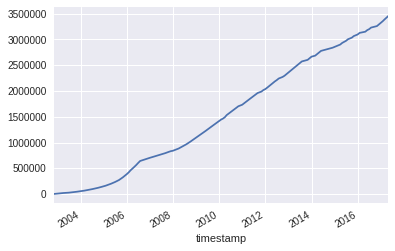

In [243]:
groupby.text_length.mean().cumsum().plot()

In [239]:
groupby.revid.count().cumsum()

timestamp
2002-10-31      27
2002-11-30      32
2002-12-31      37
2003-01-31      39
2003-02-28      40
2003-03-31      42
2003-05-31      43
2003-06-30      45
2003-07-31      52
2003-08-31      53
2003-09-30      54
2003-10-31      58
2003-11-30      61
2003-12-31      66
2004-01-31      69
2004-02-29      81
2004-03-31      86
2004-04-30      99
2004-05-31     101
2004-06-30     106
2004-07-31     115
2004-08-31     122
2004-09-30     130
2004-10-31     147
2004-11-30     151
2004-12-31     158
2005-01-31     178
2005-02-28     191
2005-03-31     200
2005-04-30     217
              ... 
2014-08-31    2547
2014-09-30    2548
2014-10-31    2552
2014-11-30    2557
2015-01-31    2562
2015-02-28    2563
2015-03-31    2566
2015-04-30    2573
2015-05-31    2579
2015-06-30    2582
2015-07-31    2587
2015-08-31    2589
2015-09-30    2595
2015-10-31    2598
2015-12-31    2610
2016-01-31    2613
2016-02-29    2614
2016-03-31    2616
2016-04-30    2624
2016-05-31    2627
2016-06-30    2633
20

In [172]:
gb

revid   text_length
page_title          timestamp                             
Bot_Approvals_Group 2006-03-31  4.550786e+07  22357.500000
                    2006-04-30  4.948476e+07  22128.285714
                    2006-06-30  5.988506e+07  22288.400000
                    2006-07-31  6.403845e+07  22194.833333
                    2006-08-31  7.193019e+07  22812.000000
                    2006-09-30  7.537475e+07  22809.280000
                    2006-10-31  8.162330e+07  21564.500000
                    2006-11-30  8.737137e+07  20290.750000
                    2006-12-31  9.513957e+07  20280.000000
                    2007-01-31  9.836190e+07  20871.777778
                    2007-03-31  1.161522e+08  20396.500000
                    2007-04-30  1.248910e+08  16395.600000
                    2007-05-31  1.299527e+08  16127.428571
                    2007-06-30  1.404499e+08  22282.500000
                    2007-07-31  1.473682e+08  23247.046512
                    2007-08-31  1.505423e+08  25711.914286
                    2007-09-30  1.574424e+08  26376.157895
                    2007-10-31  1.660487e+08  26498.600000
                    2007-11-30  1.714513e+08  25308.947368
                    2007-12-31  1.793514e+08  26037.709677
                    2008-01-31  1.843640e+08  27383.500000
                    2008-02-29  1.906924e+08  27685.590909
                    2008-03-31  1.986818e+08  25840.500000
                    2008-04-30  2.061991e+08  22293.500000
                    2008-05-31  2.122511e+08  31031.100000
                    2008-06-30  2.188313e+08  29052.800000
                    2008-07-31  2.265587e+08  27859.565217
                    2008-08-31  2.319681e+08  28515.181818
                    2008-09-30  2.375146e+08  28574.000000
                    2008-10-31  2.462557e+08  19100.000000
...                                      ...           ...
Bot_policy          2013-10-31  5.768728e+08  30773.000000
                    2013-11-30  5.815895e+08  30789.333333
                    2013-12-31  5.864039e+08  30740.500000
                    2014-02-28  5.950511e+08  20512.000000
                    2014-03-31  5.996962e+08  30659.000000
                    2014-04-30  6.052296e+08  30662.000000
                    2014-05-31  6.097438e+08  30671.333333
                    2014-08-31  6.206474e+08  30787.500000
                    2014-11-30  6.339120e+08  30660.500000
                    2015-01-31  6.413053e+08  30770.500000
                    2015-03-31  6.504767e+08  30736.000000
                    2015-04-30  6.546436e+08  30809.571429
                    2015-05-31  6.640057e+08  20528.333333
                    2015-06-30  6.662988e+08  20531.000000
                    2015-07-31  6.720042e+08  30602.000000
                    2015-09-30  6.801494e+08  30726.666667
                    2015-10-31  6.875082e+08  31038.000000
                    2015-12-31  6.961177e+08  30942.714286
                    2016-01-31  6.988763e+08  30605.333333
                    2016-04-30  7.173649e+08  23165.250000
                    2016-05-31  7.211037e+08  30916.000000
                    2016-06-30  7.240052e+08  18549.200000
                    2016-07-31  7.304565e+08  30514.000000
                    2016-10-31  7.450787e+08  28678.500000
                    2016-11-30  7.500568e+08  30946.000000
                    2016-12-31  7.573055e+08  30973.666667
                    2017-01-31  7.608786e+08  33174.000000
                    2017-02-28  7.646075e+08  33580.307692
                    2017-03-31  7.714169e+08  33859.833333
                    2017-04-30  7.736390e+08  34005.000000

[258 rows x 2 columns]

In [187]:
gb.transpose().stack()

page_title              Bot_Approvals_Group    Bot_policy
            timestamp                                    
revid       2002-10-31                  NaN  3.879841e+05
            2002-11-30                  NaN  4.400190e+05
            2002-12-31                  NaN  5.003004e+05
            2003-01-31                  NaN  6.493255e+05
            2003-02-28                  NaN  7.081240e+05
            2003-03-31                  NaN  8.140260e+05
            2003-05-31                  NaN  1.033266e+06
            2003-06-30                  NaN  1.101030e+06
            2003-07-31                  NaN  1.189096e+06
            2003-08-31                  NaN  1.463090e+06
            2003-09-30                  NaN  1.512670e+06
            2003-10-31                  NaN  1.579177e+06
            2003-11-30                  NaN  1.835398e+06
            2003-12-31                  NaN  1.939891e+06
            2004-01-31                  NaN  2.190444e+06
            2004-02-29                  NaN  2.367361e+06
            2004-03-31                  NaN  2.851249e+06
            2004-04-30                  NaN  3.187611e+06
            2004-05-31                  NaN  3.756533e+06
            2004-06-30                  NaN  4.319011e+06
            2004-07-31                  NaN  4.641609e+06
            2004-08-31                  NaN  5.416080e+06
            2004-09-30                  NaN  5.930378e+06
            2004-10-31                  NaN  6.485065e+06
            2004-11-30                  NaN  7.404394e+06
            2004-12-31                  NaN  8.705577e+06
            2005-01-31                  NaN  9.407816e+06
            2005-02-28                  NaN  1.020990e+07
            2005-03-31                  NaN  1.118876e+07
            2005-04-30                  NaN  1.250366e+07
...                                     ...           ...
text_length 2014-06-30         33492.000000           NaN
            2014-07-31         33497.000000           NaN
            2014-08-31                  NaN  3.078750e+04
            2014-09-30         33816.000000           NaN
            2014-11-30         33831.000000  3.066050e+04
            2015-01-31         33834.000000  3.077050e+04
            2015-02-28         33837.000000           NaN
            2015-03-31                  NaN  3.073600e+04
            2015-04-30                  NaN  3.080957e+04
            2015-05-31         33854.000000  2.052833e+04
            2015-06-30                  NaN  2.053100e+04
            2015-07-31         33853.500000  3.060200e+04
            2015-08-31         33846.000000           NaN
            2015-09-30         33845.000000  3.072667e+04
            2015-10-31                  NaN  3.103800e+04
            2015-12-31         33839.500000  3.094271e+04
            2016-01-31                  NaN  3.060533e+04
            2016-03-31         33480.000000           NaN
            2016-04-30         33541.500000  2.316525e+04
            2016-05-31         33556.500000  3.091600e+04
            2016-06-30         33582.000000  1.854920e+04
            2016-07-31         33575.750000  3.051400e+04
            2016-08-31         33578.250000           NaN
            2016-10-31                  NaN  2.867850e+04
            2016-11-30         33616.500000  3.094600e+04
            2016-12-31         33730.333333  3.097367e+04
            2017-01-31         33983.200000  3.317400e+04
            2017-02-28         34012.500000  3.358031e+04
            2017-03-31                  NaN  3.385983e+04
            2017-04-30                  NaN  3.400500e+04

[330 rows x 2 columns]

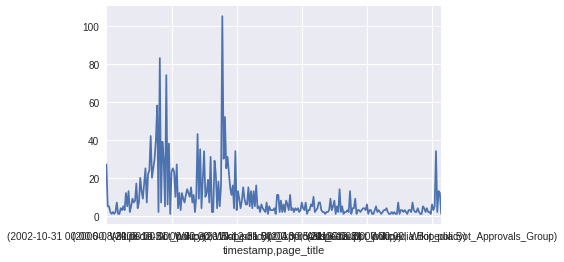

In [118]:
groupby.revid.count().plot()

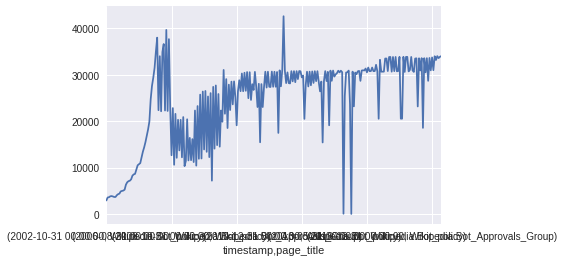

In [119]:
groupby.text_length.mean().plot()